In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("datasets_1980_3398_oasis_cross-sectional (1).csv")

In [3]:
df

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


In [4]:
df.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [5]:
df.isnull().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

In [6]:
df.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

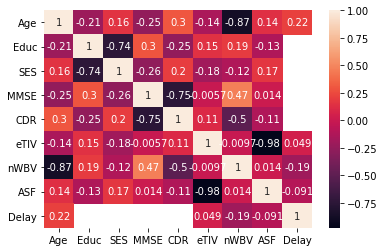

In [7]:
sns.heatmap(df.corr(), annot = True)

In [8]:
df['Educ'].fillna(df['Educ'].median(),inplace=True)

In [9]:
df['SES'].fillna(df['SES'].median(),inplace=True)

In [10]:
df['MMSE'].fillna(df['MMSE'].median(),inplace=True)

In [11]:
df['CDR'].fillna(df['CDR'].median(),inplace=True)

In [12]:
df['Delay'].fillna(df['Delay'].median(),inplace=True)

In [13]:
df.isnull().sum()

ID       0
M/F      0
Hand     0
Age      0
Educ     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Delay    0
dtype: int64

In [14]:
from plotnine import *

In [15]:
df['Age'].value_counts()

20    31
22    26
21    18
23    18
73    14
      ..
37     1
39     1
91     1
93     1
96     1
Name: Age, Length: 73, dtype: int64

In [16]:
df_new=df.groupby(['Age','CDR','ID'],as_index=False).min()

In [ ]:
#People mainly from the age 60 above have CDR=0.5 and CDR=1 There are 2 outliers having CDR=2

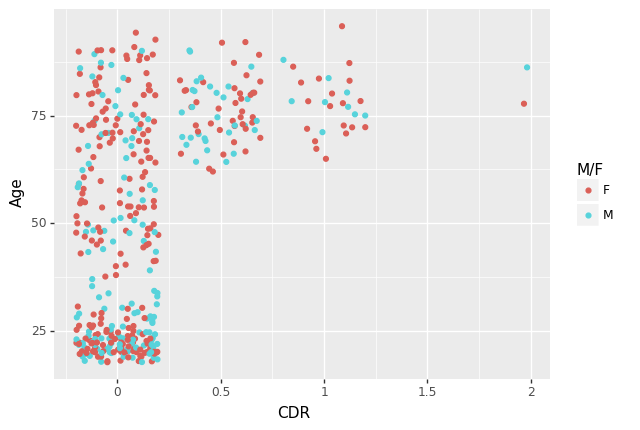

<ggplot: (-9223372036842145772)>

In [17]:
ggplot(df, aes(x='CDR', y='Age', color = 'M/F')) + geom_jitter()

In [ ]:
#Education years do not have much impact on CDR as people from all education years have CDR =0,0.5 and 1

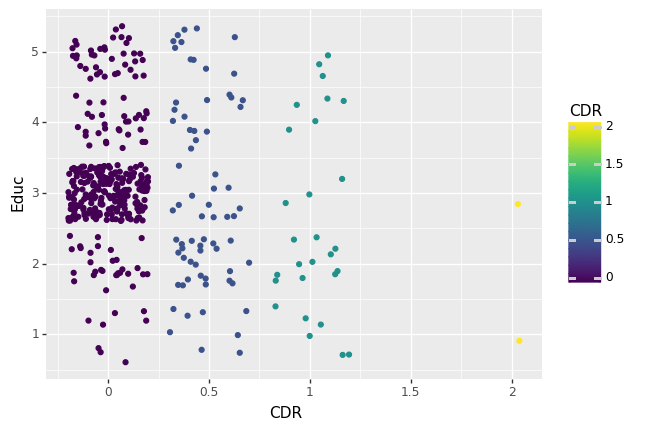

<ggplot: (-9223372036840484788)>

In [18]:
ggplot(df, aes(x='CDR', y='Educ',color='CDR')) + \
geom_jitter()

In [19]:
df['CDR'].value_counts()

0.0    336
0.5     70
1.0     28
2.0      2
Name: CDR, dtype: int64

In [20]:
df['SES'].value_counts()

2.0    285
1.0     50
4.0     49
3.0     49
5.0      3
Name: SES, dtype: int64

In [ ]:
#Social Status do not have much impact on CDR as people from all social levels have CDR =0,0.5 and 1 There are 2 outliers with CDR=2

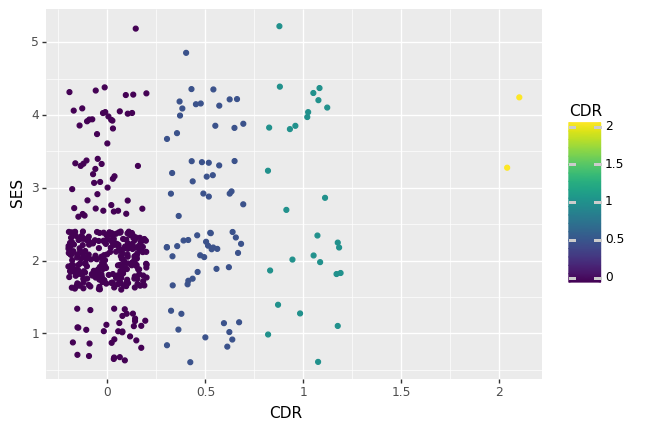

<ggplot: (-9223372036840471384)>

In [21]:
ggplot(df, aes(x='CDR', y='SES',color='CDR')) + \
geom_jitter()

In [ ]:
#People having CDR=0 are having MMSE score between 25-30

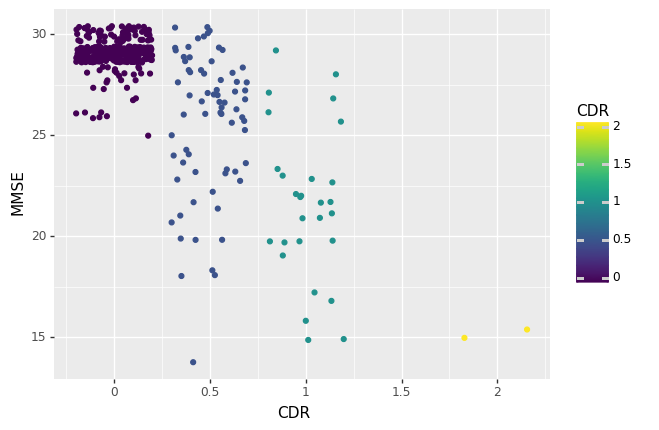

<ggplot: (-9223372036840386516)>

In [22]:
ggplot(df, aes(x='CDR', y='MMSE',color='CDR')) + \
geom_jitter()

In [ ]:
#nWBV range is narrowing as we move from CDR=0 TO CDR=1 

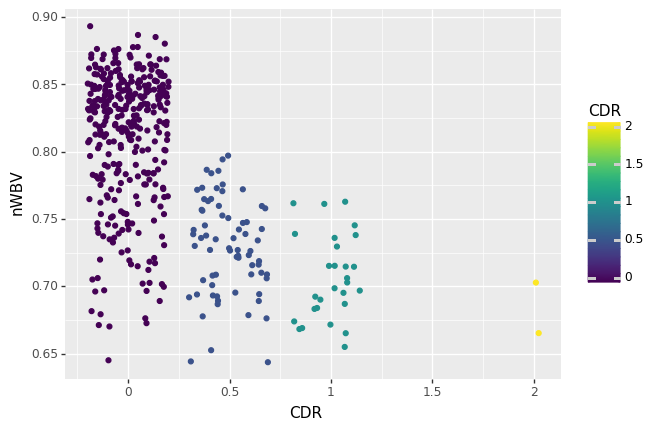

<ggplot: (-9223372036840426880)>

In [23]:
ggplot(df, aes(x='CDR', y='nWBV',color='CDR')) + \
geom_jitter()

In [ ]:
#eTIV do not have much impact on CDR 

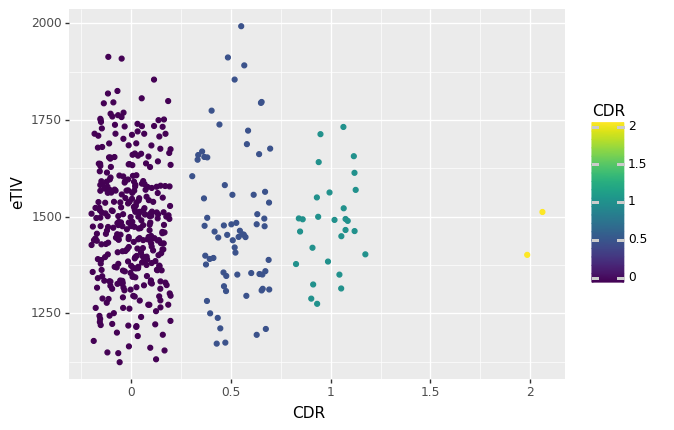

<ggplot: (-9223372036840232084)>

In [24]:
ggplot(df, aes(x='CDR', y='eTIV',color='CDR')) + \
geom_jitter()

In [ ]:
#ASF do not have much impact on CDR

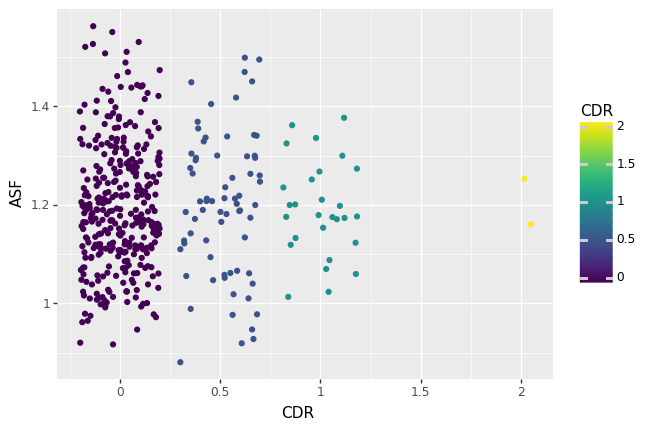

<ggplot: (-9223372036840411384)>

In [25]:
ggplot(df, aes(x='CDR', y='ASF',color='CDR')) + \
geom_jitter()

In [26]:
df.drop(['Hand'],axis=1)

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,11.0
1,OAS1_0002_MR1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,11.0
2,OAS1_0003_MR1,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,11.0
3,OAS1_0004_MR1,M,28,3.0,2.0,29.0,0.0,1588,0.803,1.105,11.0
4,OAS1_0005_MR1,M,18,3.0,2.0,29.0,0.0,1737,0.848,1.010,11.0
...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,20,3.0,2.0,29.0,0.0,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,22,3.0,2.0,29.0,0.0,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,22,3.0,2.0,29.0,0.0,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,20,3.0,2.0,29.0,0.0,1262,0.861,1.390,2.0


In [27]:
df.drop(['ASF'],axis=1,inplace=True)

In [28]:
df.drop(['Hand'],axis=1,inplace=True)

In [29]:
df.drop(['M/F'],axis=1,inplace=True)

In [30]:
df.drop(['ID'],axis=1,inplace=True)

In [31]:
df

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,Delay
0,74,2.0,3.0,29.0,0.0,1344,0.743,11.0
1,55,4.0,1.0,29.0,0.0,1147,0.810,11.0
2,73,4.0,3.0,27.0,0.5,1454,0.708,11.0
3,28,3.0,2.0,29.0,0.0,1588,0.803,11.0
4,18,3.0,2.0,29.0,0.0,1737,0.848,11.0
...,...,...,...,...,...,...,...,...
431,20,3.0,2.0,29.0,0.0,1469,0.847,2.0
432,22,3.0,2.0,29.0,0.0,1684,0.790,40.0
433,22,3.0,2.0,29.0,0.0,1580,0.856,89.0
434,20,3.0,2.0,29.0,0.0,1262,0.861,2.0


In [32]:
df['CDR'] = df['CDR'].astype(str)

In [33]:
X=df.loc[:, ~df.columns.isin(['CDR'])]
y=df.CDR

In [34]:
y

0      0.0
1      0.0
2      0.5
3      0.0
4      0.0
      ... 
431    0.0
432    0.0
433    0.0
434    0.0
435    0.0
Name: CDR, Length: 436, dtype: object

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [36]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

In [37]:
Decision_Tree_Class_Model=DecisionTreeClassifier(criterion='entropy',min_samples_split=80,max_features="auto",random_state=0,max_depth=7)

In [38]:
Decision_Tree_Class_Model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       min_samples_split=80, random_state=0)

In [39]:
y_pred=Decision_Tree_Class_Model.predict(X_test)

In [40]:
y_pred

array(['0.0', '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.5', '0.5',
       '0.0', '0.0', '0.5', '0.0', '0.5', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.5', '0.0', '0.5', '0.0', '0.5', '0.0', '0.0',
       '0.5', '0.0', '0.0', '0.0', '0.0', '0.5', '0.0', '0.5', '0.0',
       '0.5', '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.0', '0.0',
       '0.5', '0.5', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.5', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.5',
       '0.5', '0.0', '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.0',
       '0.5', '0.0', '0.5', '0.0', '0.5', '0.0', '0.5', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.5', '0.0', '0.5', '0.0', '0.0', '0.5', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.5', '0.0', '0.5', '0.5', '0.5', '0.5',
       '0.0'], dtype=object)

In [41]:
from sklearn import tree, metrics

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 23
Accuracy: 0.79


In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [43]:
confusion_matrix(y_test, y_pred)

array([[73, 11,  0,  0],
       [ 4, 13,  0,  0],
       [ 1,  6,  0,  0],
       [ 0,  1,  0,  0]], dtype=int64)

In [44]:
a= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
a

,Actual,Predicted
153,0.0,0.0
393,0.0,0.0
54,0.0,0.0
188,0.0,0.0
196,0.0,0.5
...,...,...
20,0.5,0.5
346,1.0,0.5
278,2.0,0.5
14,0.5,0.5


In [45]:
f1_score(y_test, y_pred, average=None)

array([0.90123457, 0.54166667, 0.        , 0.        ])

In [46]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)
f1 = f1_score(y_test, y_pred,average=None)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [47]:
precision

array([0.93589744, 0.41935484, 0.        , 0.        ])

In [48]:
recall

array([0.86904762, 0.76470588, 0.        , 0.        ])

In [49]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion="entropy",n_estimators=100,min_samples_split=80,max_depth=7,max_features="auto",min_samples_leaf=2)

In [50]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=80)

In [51]:
y_pred_new=model.predict(X_test)

In [52]:
y_pred_new

array(['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.5', '0.5',
       '0.0', '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.5', '0.0', '0.5', '0.0', '0.5', '0.0', '0.0',
       '0.5', '0.0', '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.0',
       '0.5', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.5', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.0',
       '0.5', '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.5', '0.0', '0.5', '0.5', '0.5', '0.5',
       '0.0'], dtype=object)

In [53]:
count_misclassified = (y_test != y_pred_new).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred_new)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 17
Accuracy: 0.84


In [54]:
confusion_matrix(y_test, y_pred_new)

array([[82,  2,  0,  0],
       [ 7, 10,  0,  0],
       [ 1,  6,  0,  0],
       [ 0,  1,  0,  0]], dtype=int64)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
model_new=GradientBoostingClassifier( criterion='friedman_mse',n_estimators=100,min_samples_split=80,max_depth=7,max_features="auto")

In [56]:
model_new.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=7, max_features='auto',
                           min_samples_split=80)

In [57]:
y_pred_second=model.predict(X_test)

In [58]:
y_pred_second

array(['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.5', '0.5',
       '0.0', '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.5', '0.0', '0.5', '0.0', '0.5', '0.0', '0.0',
       '0.5', '0.0', '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.0',
       '0.5', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.5', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.0',
       '0.5', '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.5', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.5', '0.0', '0.5', '0.5', '0.5', '0.5',
       '0.0'], dtype=object)

In [59]:
count_misclassified = (y_test != y_pred_second).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred_second)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 17
Accuracy: 0.84


In [60]:
n_estimators=[500,800,1500,2500,5000]
max_features=['auto','sqrt','log2']
max_depth=[10,20,30,40,50]
max_depth.append(None)
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10,15]


In [ ]:
grid_param={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
RFR=RandomForestClassifier(random_state=1)
RFR_random=RandomizedSearchCV(estimator=RFR,param_distributions=grid_param,n_iter=500,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
RFR_random.fit(X_train,y_train)
print(RFR_random.best_params_)

In [61]:
df.drop(['Educ'],axis=1,inplace=True)

In [62]:
df.drop(['SES'],axis=1,inplace=True)

In [63]:
df

,Age,MMSE,CDR,eTIV,nWBV,Delay
0,74,29.0,0.0,1344,0.743,11.0
1,55,29.0,0.0,1147,0.810,11.0
2,73,27.0,0.5,1454,0.708,11.0
3,28,29.0,0.0,1588,0.803,11.0
4,18,29.0,0.0,1737,0.848,11.0
...,...,...,...,...,...,...
431,20,29.0,0.0,1469,0.847,2.0
432,22,29.0,0.0,1684,0.790,40.0
433,22,29.0,0.0,1580,0.856,89.0
434,20,29.0,0.0,1262,0.861,2.0


In [64]:
X=df.loc[:, ~df.columns.isin(['CDR'])]
y=df.CDR

In [65]:
y

0      0.0
1      0.0
2      0.5
3      0.0
4      0.0
      ... 
431    0.0
432    0.0
433    0.0
434    0.0
435    0.0
Name: CDR, Length: 436, dtype: object

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [67]:
Decision_Tree_Class_Model=DecisionTreeClassifier(criterion='entropy',min_samples_split=80,max_features="auto",random_state=0,max_depth=7)

In [68]:
Decision_Tree_Class_Model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       min_samples_split=80, random_state=0)

In [69]:
y_pred=Decision_Tree_Class_Model.predict(X_test)

In [75]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 28
Accuracy: 0.74


In [71]:
model=RandomForestClassifier(criterion="entropy",n_estimators=100,min_samples_split=80,max_depth=7,max_features="auto",min_samples_leaf=2)

In [72]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=80)

In [73]:
y_pred_new=model.predict(X_test)

In [74]:
count_misclassified = (y_test != y_pred_new).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred_new)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 15
Accuracy: 0.86


Out of all three algorithms (Decision Tree Classifier,GradientBoosting Claasifier ,Random Forest Classifier)Random Forest classifier worked the best with Acurracy as 86%.